## Latihan 3 - Dataset Mushrooms

### Tentang Dataset

*Jenis Data:* Data terkait dengan karakteristik fisik dan kimia jamur
*Jumlah Fitur:* Fitur-fitur dalam dataset mencakup berbagai atribut seperti warna, bentuk,
ukuran, dan aroma jamur.
*Target:* Variabel target menunjukkan apakah jamur tersebut dapat dimakan (edible) atau
beracun (poisonous).
*Penamaan Kolom yang digunakan:*
1. class : kelas: dapat dimakan = e, beracun = p
2. cap.shape : bentuk topi: bel = b, kerucut = c, cembung = x, datar = f, knobbed = k, cekung = s
4. cap.surface : tutup-permukaan : berserat = f, alur = g, bersisik = y, halus = s
5. cap.color : warna topi : coklat = n, buff = b, kayu manis = c, abu-abu = g, hijau = r, pink p, ungu = u, merah = e, putih = w, kuning = y
7. bruises : memar = t, no = f
8. odor : bau : almond = a, adas = l, creosote = c, amis = y, busuk = f, apak = m, tidak ada = n, pedas = p, pedas = s
10. gill.attachment : lampiran-insang : terlampir = a, turun = d, bebas = f, berlekuk = n
11. gill.spacing : jarak insang : dekat = c, ramai = w, jauh = d
12. gill.size : ukuran insang : luas = b, sempit = n
13. gill.color : warna insang : hitam = k, coklat = n, buff = b, coklat = h, abu-abu = g, hijau = r, oranye = o, merah muda = p, ungu = u, merah = e, putih = w, kuning = y
15. stalk.shape :tangkai-bentuk: memperbesar = e, meruncing = t
16. stalk.root :root-root: bulbous = b, club = c, cup = u, sama = e, rhizomorphs = z,
17. rooted= r, missing =?
18. stalk.surface.above.ring:tangkai-permukaan-atas-cincin: berserat = f, bersisik = y, halus = k, halus = s
20. stalk.surface.below.ring:tangkai-permukaan-di bawah-cincin: berserat = f, bersisik = y,halus = k, halus = s
22. veil.type :tipe kerudung: sebagian = p, universal = u
23. veil.color :kerudung-warna: coklat = n, oranye = o, putih = w, kuning = y
24. ring.number :dering-angka: tidak ada = n, satu = o, dua = t
25. ring.type :tipe cincin: jaring laba-laba = c, evanescent = e, flaring = f, besar = l, tidak ada = n, liontin = p, selubung = s, zona = z
27. spore.print.color :spora-cetak-warna: hitam = k, coklat = n, buff = b, coklat = h, hijau = r, oranye = o, ungu = u, putih = w, kuning = y
29. population :populasi: berlimpah = a, berkerumun = c, banyak = n, tersebar = s,
30. beberapa = v, soliter = y
31. habitat :habitat: rumput = g, daun = l, padang rumput = m, jalur = p, perkotaan = u,
32. limbah = w, kayu = d

### Import Library

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the Mushroom dataset

In [24]:
data = pd.read_csv('input/mushrooms.csv')

### Explore the dataset and handle any missing values

#### Mencetak 5 data pertama

In [25]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


##### Mencari informasi dan deskripsi dari dataset

In [26]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Cek apakah ada kolom yang null atau tidak

In [27]:
data.isna().sum()
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Preprocess the data

#### Encode Categorical Variables

In [28]:
label_encoder = LabelEncoder()

for col in data.columns:
    data[str(col)] = label_encoder.fit_transform(data[str(col)])

In [29]:
scaler = MinMaxScaler()
for col in data.columns:
    col_data = data[str(col)].values.reshape(-1, 1)
    data[str(col)] = scaler.fit_transform(col_data)

### Split the dataset into training and testing sets

In [30]:
X = data.drop('class',axis='columns')
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

### Train a classification model using Random Forest

In [31]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

### Evaluate the model's performance on the testing sets

In [32]:
accuracy = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)
class_report = classification_report(y_test, y_predict)

print("Akurasi: {:.2f}".format(accuracy*100),"%")
print("Confusion Matrix:")
print(conf_matrix)
print("Evaluasi Model:")
print(class_report)

Akurasi: 100.00 %
Confusion Matrix:
[[820   0]
 [  0 805]]
Evaluasi Model:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       820
         1.0       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



C:\Users\kekop\AppData\Local\Temp\ipykernel_24320\1168726285.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


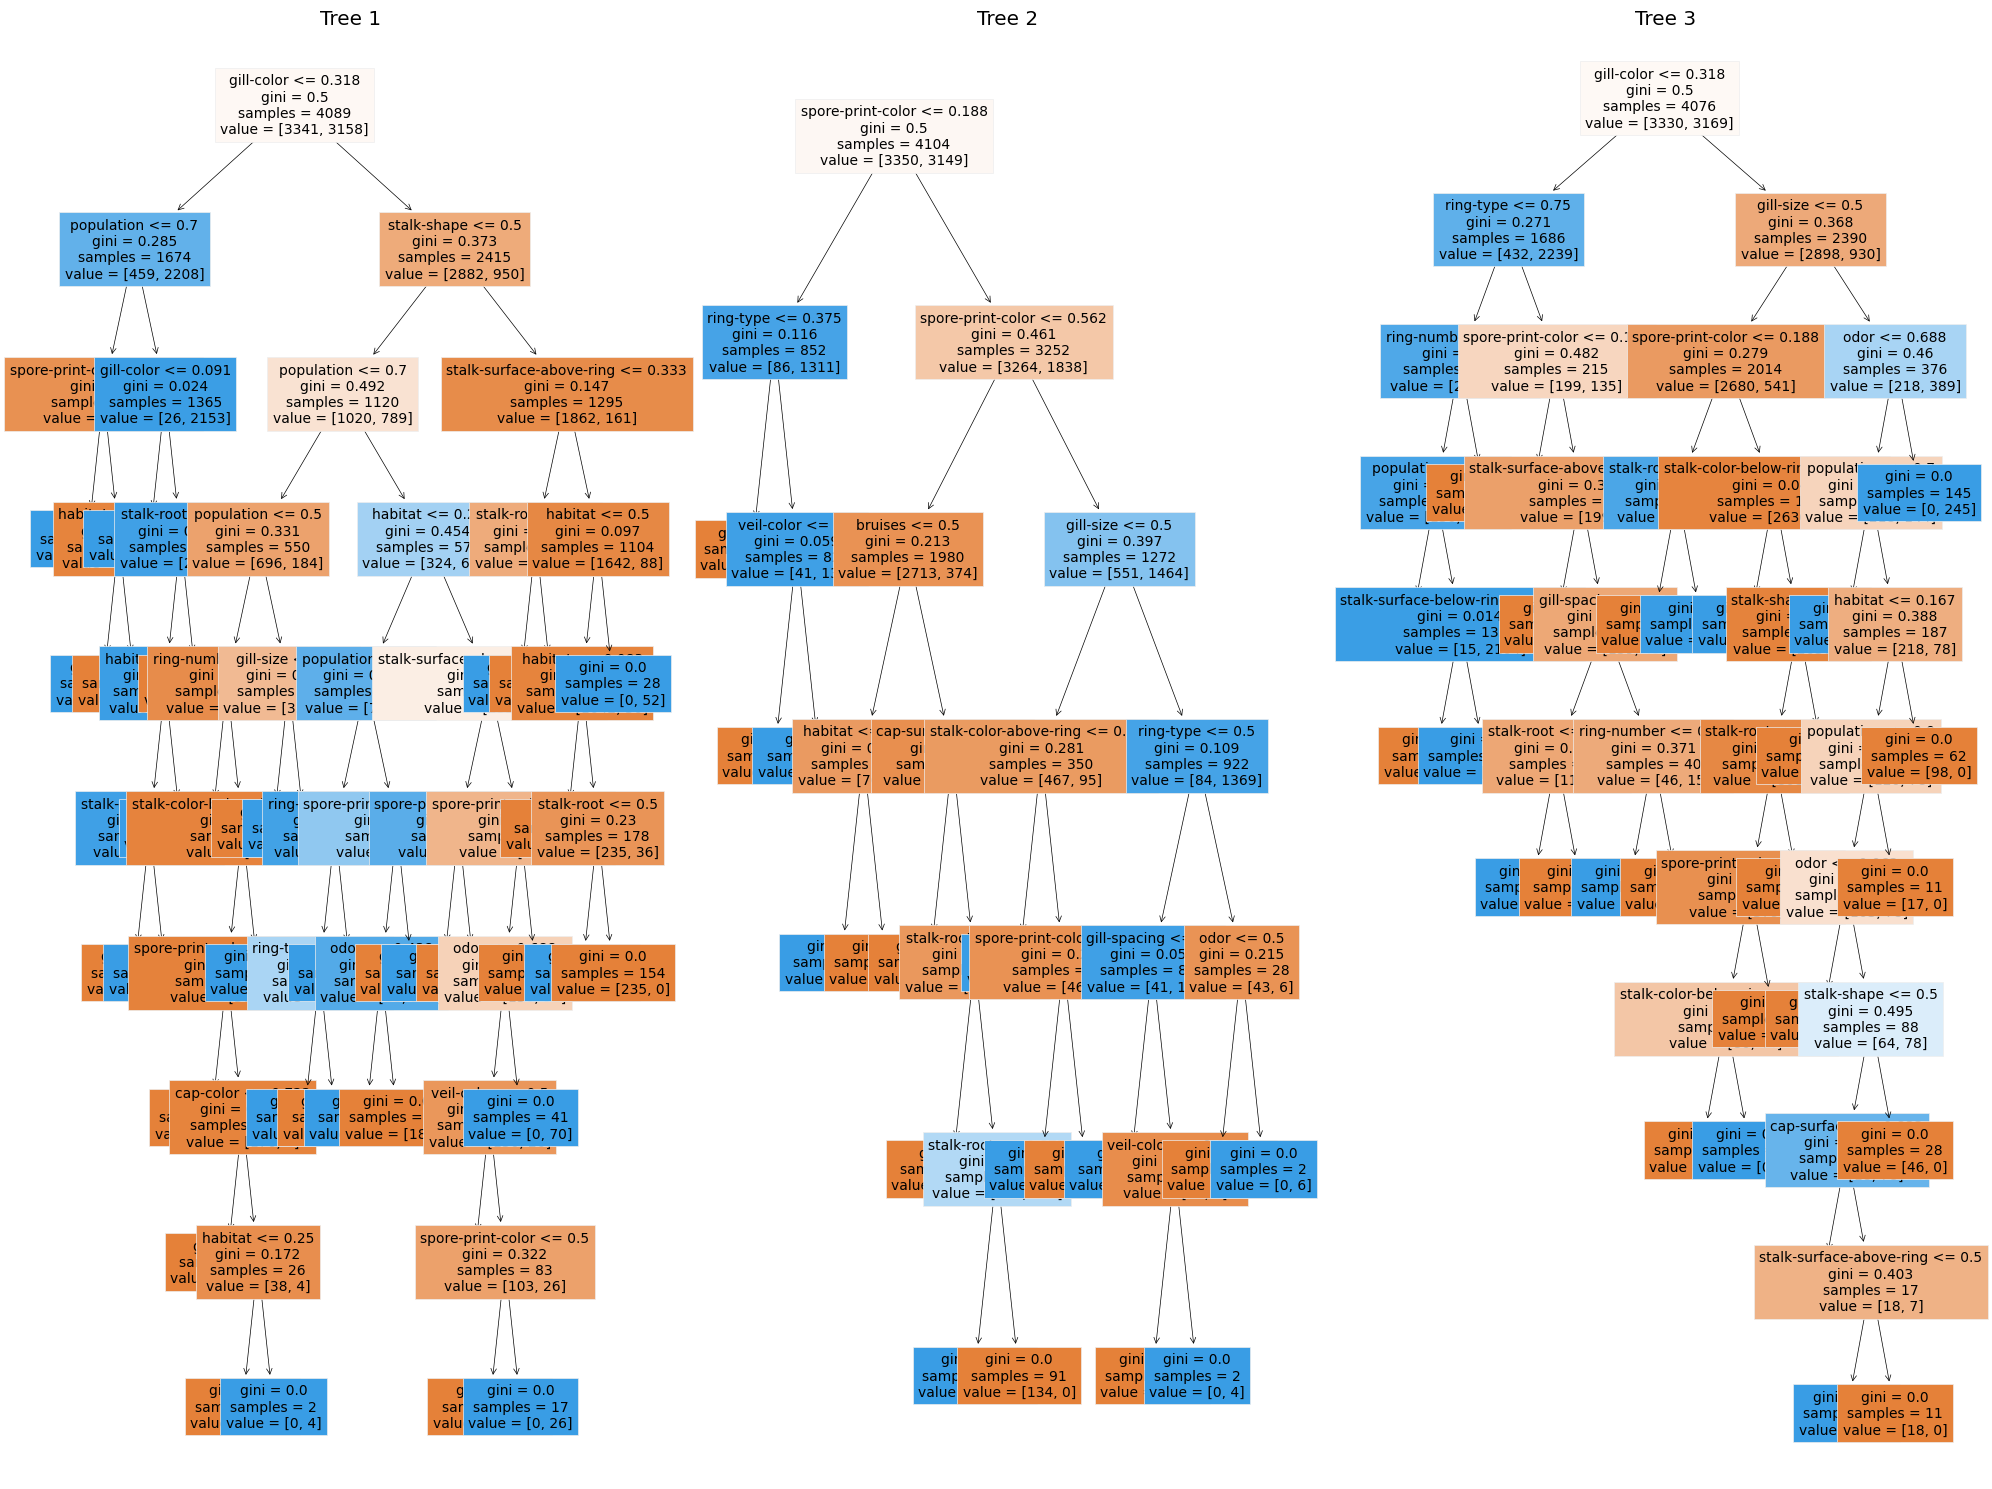

In [33]:
num_trees_to_visualize = 3
plt.figure(figsize=(20, 15))
for index in range(num_trees_to_visualize):
    plt.subplot(1, 3, index + 1)
    plot_tree(model.estimators_[index], feature_names=X_train.columns, filled=True, fontsize=10) # Memperbaiki sintaks plot_tree
    plt.title(f'Tree {index + 1}')
    plt.tight_layout()
plt.show()